<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240422_Operations_Department_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P90-S5-Operations-Department.zip

--2024-04-21 23:47:05--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P90-S5-Operations-Department.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 16.12.64.138, 3.5.132.182, 3.5.133.136, ...
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|16.12.64.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136063008 (130M) [application/zip]
Saving to: ‘P90-S5-Operations-Department.zip’

P90-S5-Operations-D 100%[===================>] 129.76M  72.3MB/s    in 1.8s    

2024-04-21 23:47:07 (72.3 MB/s) - ‘P90-S5-Operations-Department.zip’ saved [136063008/136063008]



In [2]:
! unzip P90-S5-Operations-Department.zip
! ls

Archive:  P90-S5-Operations-Department.zip
   creating: 4. Operations Department/
   creating: 4. Operations Department/Dataset/
   creating: 4. Operations Department/Dataset/0/
  inflating: 4. Operations Department/Dataset/0/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: 4. Operations Department/Dataset/0/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: 4. Operations Department/Dataset/0/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: 4. Operations Department/Dataset/0/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: 4. Operations Department/Dataset/0/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: 4. Operations Department/Dataset/0/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: 4. Operations Department/Dataset/0/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: 4. Operations Department/Dataset/0/1-s2.0-S0929664620300449-gr3_lrg-a.jpg  
  inflating: 4. Operations Department/Dataset/0/1-s2.0-S0929664620300449-gr3_lrg-b.jpg  
  inflating: 4. O

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=19BuQ5m0xZWC7vQN4jX9lukmJ4aE0EkL8)

![alt text](https://drive.google.com/uc?id=10tbeSkGZ0xdHtqTGhYwHhb9PPURw0BfD)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [3]:
# This is a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.
# Each class contains 133 images.
# Dataset Source:
# https://github.com/ieee8023/covid-chestxray-dataset
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Specify training data directory
X_Ray_Directory = './4. Operations Department/Dataset'

In [8]:
# List the folders in the directory
os.listdir(X_Ray_Directory)

['1', '0', '3', '2']

In [9]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation
image_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [10]:
# Generate batches of 40 images
# Total number of images is 133*4 = 532 images
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing

train_generator = image_generator.flow_from_directory(batch_size = 40, directory = X_Ray_Directory, shuffle = True, target_size = (256,256),
                                                      class_mode = 'categorical',subset = 'training')

Found 428 images belonging to 4 classes.


In [11]:

validation_generator = image_generator.flow_from_directory(batch_size = 40, directory = X_Ray_Directory, shuffle = True, target_size = (256,256),
                                                      class_mode = 'categorical',subset = 'validation')

Found 104 images belonging to 4 classes.


In [12]:
# Generate a batch of 40 images and labels
train_images, train_label = next(train_generator)

In [13]:
train_images.shape

(40, 256, 256, 3)

In [15]:
train_label.shape

(40, 4)

In [16]:
train_images

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.01568628, 0.01568628, 0.01568628],
         [0.03921569, 0.03921569, 0.03921569],
         [0.        , 0.        , 0.        ]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.01568628, 0.01568628, 0.01568628],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.01176471, 0.01176471, 0.01176471],
         [0.01568628, 0.01568628, 0.01568628],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.01568628, 0.01568628, 0.01568628],
         [0.02745098, 0.02745098, 0.02745098],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [17]:
# labels Translator
label_names = {0: 'Covid-19', 1:'Normal', 2: 'Viral Rneumonia', 3: 'Bactrial Pneumonia'}

# TASK #3: VISUALIZE DATASET

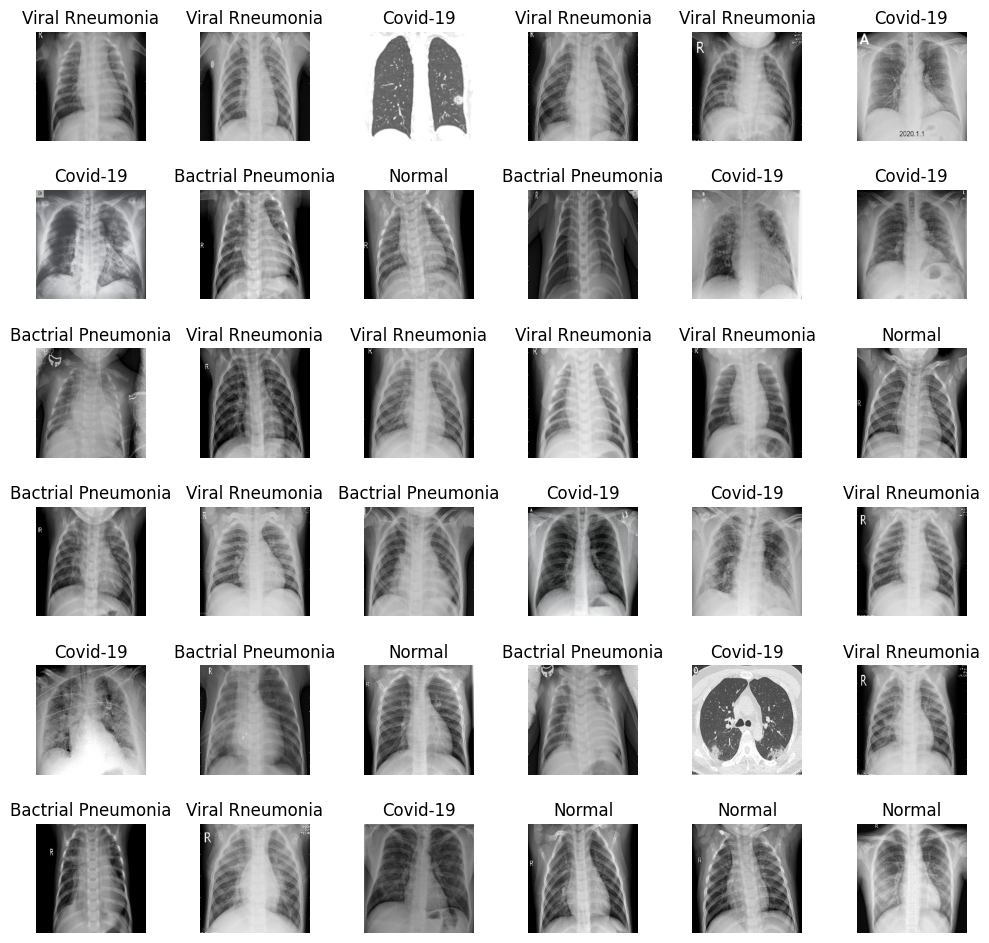

In [25]:
L = 6
W =6

fig, axes = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L* W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_label[i])])

    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

# TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=176TJGdJtNZmX4J5QyeI8W_YS5f1gg5VS)

![alt text](https://drive.google.com/uc?id=1340UvqbXc-sy6cIuVg7ZbOwcga2JxfkP)

![alt text](https://drive.google.com/uc?id=1hngDlUf9JnwUhPII-Ah7KTtcvoeTI9m8)

![alt text](https://drive.google.com/uc?id=1nt8iX7H2LEhaWgGCi_NIb05DMQEoJVfI)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

![alt text](https://drive.google.com/uc?id=1Wnti2DSmA2qMRsgkD7Z_MJkmed0bJZTN)

전이학습에서 중요한 것은 유사한 모델을 가져와야 한다는 거야.

![alt text](https://drive.google.com/uc?id=1Chdq0gdnHGYDDb50pMMtcTOZMr0u37Iz)

![alt text](https://drive.google.com/uc?id=14niGb232X6l8OD1dMT4a_u3fjh_jKuMS)

전이학습은 모델을 절반으로 나눠.

훈련 매개벼누만 전송해.

훈련된 레이어, 기초모델을 복사하고

새로운 맞춤형 레이어와 출력을 추가하는 방식



![alt text](https://drive.google.com/uc?id=1dye4zWALCDu8a1a-58HfZk4On4nVuizV)

# TASK #6: IMPORT MODEL WITH PRETRAINED WEIGHTS

In [26]:
# ResNet은 네트워크 API야
basemodel =ResNet50(weights = 'imagenet', # 어디 데이터를 학습할 것인지
                    include_top = False, # 분류 책임자
                    input_tensor = Input(shape = (256,256,3)))

94765736/94765736 [==============================] - 1s 0us/step


In [28]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [30]:
# freezing layers in the model 마지막 10개의 레이어만 훈련할 수 있도록
for layer in basemodel.layers[:-10]:
    layer.trainable = False

In [41]:
for layer in basemodel.layers[:]:
    print(f' layer name : {layer.name}, layer trainable {layer.trainable}')
    layer.trainable = False

 layer name : input_1, layer trainable False
 layer name : conv1_pad, layer trainable False
 layer name : conv1_conv, layer trainable False
 layer name : conv1_bn, layer trainable False
 layer name : conv1_relu, layer trainable False
 layer name : pool1_pad, layer trainable False
 layer name : pool1_pool, layer trainable False
 layer name : conv2_block1_1_conv, layer trainable False
 layer name : conv2_block1_1_bn, layer trainable False
 layer name : conv2_block1_1_relu, layer trainable False
 layer name : conv2_block1_2_conv, layer trainable False
 layer name : conv2_block1_2_bn, layer trainable False
 layer name : conv2_block1_2_relu, layer trainable False
 layer name : conv2_block1_0_conv, layer trainable False
 layer name : conv2_block1_3_conv, layer trainable False
 layer name : conv2_block1_0_bn, layer trainable False
 layer name : conv2_block1_3_bn, layer trainable False
 layer name : conv2_block1_add, layer trainable False
 layer name : conv2_block1_out, layer trainable False
 

# TASK #7: BUILD AND TRAIN DEEP LEARNING MODEL

In [43]:
basemodel.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>

In [31]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(units = 256, activation = 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(units = 256, activation = 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)

headmodel = Dense(4, activation = 'softmax')(headmodel)

In [35]:
# 이미 구조가 모두 연결되어있어서 이렇게 input, output만 정해줘도 이전 데이터를 모두 불러올 수 있어.
model = Model(inputs = basemodel.input, outputs = headmodel)

In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 0.4), metrics = ['accuracy'])

In [37]:
# using early stopping to exit training if validation loss is not decreasing after certain number of epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 20)
# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = 'weights.hdf5',verbose = 1, save_best_only = True)

In [38]:
train_generator = image_generator.flow_from_directory(batch_size = 4, directory= X_Ray_Directory,
                                                      shuffle = True, target_size = (256,256), class_mode = 'categorical', subset = 'training')
val_generator = image_generator.flow_from_directory(batch_size = 4, directory= X_Ray_Directory,
                                                      shuffle = True, target_size = (256,256), class_mode = 'categorical', subset = 'validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [39]:
history = model.fit_generator(train_generator, epochs = 5, validation_data = val_generator,
                              callbacks =[checkpointer, earlystopping])

<ipython-input-39-560dbdf982d2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 5, validation_data = val_generator,


Epoch 1/5
107/107 [==============================] - ETA: 0s - loss: 1.7233 - accuracy: 0.2547
Epoch 1: val_loss improved from inf to 1.47192, saving model to weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 185s 2s/step - loss: 1.7233 - accuracy: 0.2547 - val_loss: 1.4719 - val_accuracy: 0.3077
Epoch 2/5
107/107 [==============================] - ETA: 0s - loss: 1.4259 - accuracy: 0.3505
Epoch 2: val_loss did not improve from 1.47192
107/107 [==============================] - 150s 1s/step - loss: 1.4259 - accuracy: 0.3505 - val_loss: 4.2756 - val_accuracy: 0.2981
Epoch 3/5
107/107 [==============================] - ETA: 0s - loss: 1.2339 - accuracy: 0.4439
Epoch 3: val_loss did not improve from 1.47192
107/107 [==============================] - 176s 2s/step - loss: 1.2339 - accuracy: 0.4439 - val_loss: 3.7281 - val_accuracy: 0.3077
Epoch 4/5
107/107 [==============================] - ETA: 0s - loss: 1.1797 - accuracy: 0.4416
Epoch 4: val_loss improved from 1.47192 to 1.19036, saving model to weights.hdf5
107/107 [==============================] - 180s 2s/step - loss: 1.1797 - accuracy: 0.4416 - val_loss: 1.1904 - val_accuracy: 0.4904
Epoch 5/5
10

In [ ]:
# # 파라미터 수정해서 모델 재훈련

# headmodel = basemodel.output
# headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
# headmodel = Flatten(name = 'flatten')(headmodel)
# headmodel = Dense(units = 256, activation = 'relu')(headmodel)
# headmodel = Dropout(0.3)(headmodel)
# headmodel = Dense(units = 256, activation = 'relu')(headmodel)
# headmodel = Dropout(0.3)(headmodel)

# headmodel = Dense(4, activation = 'softmax')(headmodel)

# model = Model(inputs = basemodel.input, outputs = headmodel)

# model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 0.4), metrics = ['accuracy'])

# TASK #8: EVALUATE TRAINED DEEP LEARNING MODEL

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Training accuracy and loss')

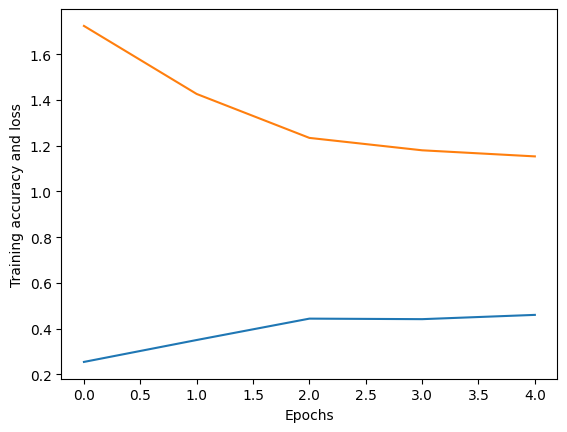

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training accuracy and loss')

Text(0, 0.5, 'validation accuracy and loss')

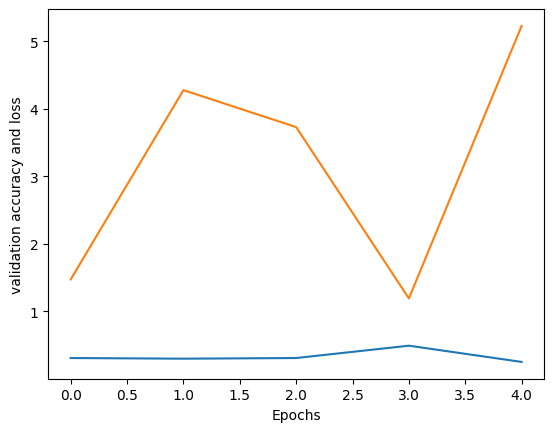

In [45]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('validation accuracy and loss')

In [46]:
test_directory = './4. Operations Department/Test'

In [49]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_directory(batch_size = 40, directory = test_directory, shuffle = True, target_size = (256,256),
                                              class_mode = 'categorical')
evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose = 1)
print(f'Accuracy Test : {evaluate[1]}')

Found 40 images belonging to 4 classes.


<ipython-input-49-b14484b8ed06>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose = 1)


 1/10 [==>...........................] - ETA: 1:49 - loss: 4.9390 - accuracy: 0.2500

10/10 [==============================] - 12s 12ms/step - loss: 4.9390 - accuracy: 0.2500
Accuracy Test : 0.25


In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
    for item in os.listdir(os.path.join(test_directory,str(i))):
        img = cv2.imread(os.path.join(test_directory, str(i), item))
        img = cv2.resize(img,(256,256))
        image.append(img)
        img = img/ 25
        img = img.reshape(-1,256,256,3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

1/1 [==============================] - 0s 246ms/step


In [56]:
score = accuracy_score(original, prediction)
print('Test Accuracy : ',score)

Test Accuracy :  0.25


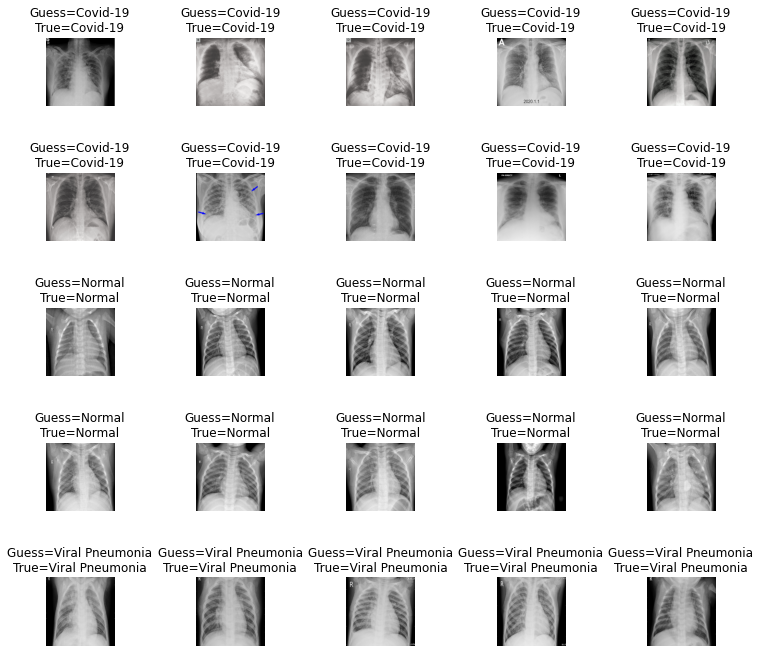

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.83      1.00      0.91        10
           2       1.00      0.50      0.67        10
           3       0.82      0.90      0.86        10

    accuracy                           0.85        40
   macro avg       0.87      0.85      0.84        40
weighted avg       0.87      0.85      0.84        40



Text(0.5, 1.0, 'Confusion_matrix')

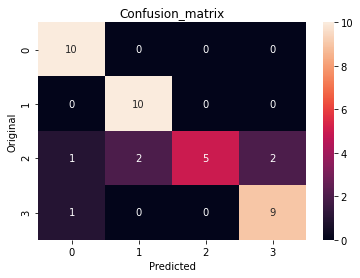

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS